# Single Audit Explorer (File Two): 
## Exploratory Text Analytics (ETA) with BERT
## Sentiment Analysis with RoBERTa

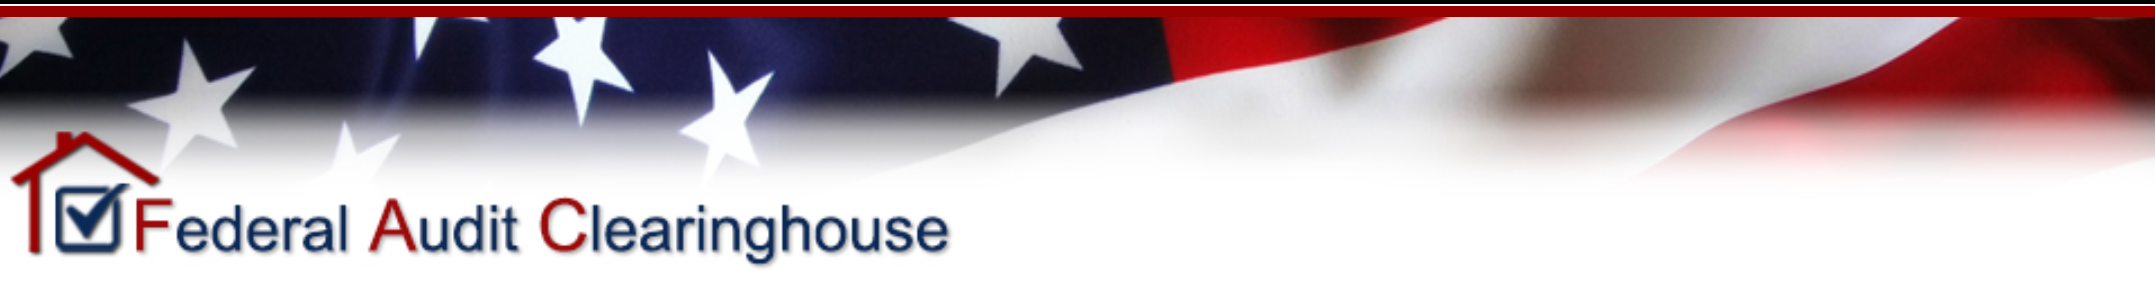

Part Four:  BERT Topic Model

Bidirectional Encoder Representations from Transformers (BERT) is a transformer-based machine learning technique for natural language processing (NLP) pre-training developed by Google. BERT was created and published in 2018 by Jacob Devlin and his colleagues from Google.[1][2] In 2019, Google announced that it had begun leveraging BERT in its search engine, and by late 2020 it was using BERT in almost every English-language query. A 2020 literature survey concluded that "in a little over a year, BERT has become a ubiquitous baseline in NLP experiments", counting over 150 research publications analyzing and improving the model.[3]

The original English-language BERT has two models:[1] (1) the BERTBASE: 12 encoders with 12 bidirectional self-attention heads, and (2) the BERTLARGE: 24 encoders with 16 bidirectional self-attention heads. Both models are pre-trained from unlabeled data extracted from the BooksCorpus[4] with 800M words and English Wikipedia with 2,500M words.

Source:  https://en.wikipedia.org/wiki/BERT_(language_model)

Code Tutorial Source:  https://github.com/bhattbhavesh91/BERT-Topic-Modeling/blob/main/BERT-Topic-Modelling.ipynb

In [1]:
# Install BERT
!pip install bertopic[visualization] --quiet

     |████████████████████████████████| 76 kB 2.0 MB/s 
     |████████████████████████████████| 85 kB 3.4 MB/s 
     |████████████████████████████████| 5.2 MB 53.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 6.2 MB/s 
     |████████████████████████████████| 4.7 MB 31.3 MB/s 
     |████████████████████████████████| 1.3 MB 49.7 MB/s 
     |████████████████████████████████| 101 kB 10.8 MB/s 
     |████████████████████████████████| 636 kB 61.2 MB/s 
     |████████████████████████████████| 6.6 MB 35.7 MB/s 
     |████████████████████████████████| 1.1 MB 35.7 MB/s 


In [2]:
# Additional Imports Needed
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

In [3]:
#Load the data
#Data must be imported as a CSV UTF-8 (Comma Delimited) File from Excel or other app
#Choose Files from where they are located on your computer
from google.colab import files
uploaded = files.upload()

Saving findingstext20.csv to findingstext20.csv


In [4]:
# Store csv file in a df (dataframe) variable
df = pd.read_csv("findingstext20.csv")

In [5]:
# Drop columns not needed for ETA
df = df.drop(['SEQ_NUMBER', 'AUDITYEAR', 'FINDINGREFNUMS', 'CHARTSTABLES'], axis=1)

In [6]:
# View the dataframe df
df.head(3)

,DBKEY,TEXT
0,41363,Finding reference number:2020-003CFDA title an...
1,41363,Finding reference number:2020-002CFDA title an...
2,41363,Finding reference number:2020-001CFDA title an...


In [7]:
# Data cleaning
# Code Excerpt from:  https://towardsdatascience.com/implement-your-topic-modeling-using-the-bertopic-library-d6708baa78fe

#Imports
import re 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

stop_words = stopwords.words('english')

def clean_text(x):
  x = str(x)
  x = x.lower()
  x = re.sub(r'#[A-Za-z0-9]*', ' ', x)
  x = re.sub(r'https*://.*', ' ', x)
  x = re.sub(r'@[A-Za-z0-9]+', ' ', x)
  tokens = word_tokenize(x)
  x = ' '.join([w for w in tokens if not w.lower() in stop_words])
  x = re.sub(r'[%s]' % re.escape('!"#$%&\()*+,-./:;<=>?@[\\]^_`{|}~“…”’'), ' ', x)
  x = re.sub(r'\d+', ' ', x)
  x = re.sub(r'\n+', ' ', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x


df['clean_text'] = df.TEXT.apply(clean_text)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,DBKEY,TEXT,clean_text
0,41363,Finding reference number:2020-003CFDA title an...,finding reference number cfda title number fed...
1,41363,Finding reference number:2020-002CFDA title an...,finding reference number cfda title number fed...
2,41363,Finding reference number:2020-001CFDA title an...,finding reference number cfda title number fed...
3,126387,Finding reference number: 2020-001CFDA title a...,finding reference number cfda title number fed...
4,79267,Conditions and Criteria: Monthly replacement r...,conditions criteria monthly replacement reserv...


In [8]:
docs = list(df.loc[:, "clean_text"].values)

Create BERT Topic Model

In [9]:
model = BERTopic(language="english")
topics, probs = model.fit_transform(docs)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [10]:
# Extract Most Frequent Topics
model.get_topic_freq()

,Topic,Count
0,-1,3678
1,0,375
2,1,371
3,2,334
4,3,314
...,...,...
164,163,11
165,164,11
166,165,11
167,166,11


In [11]:
model.get_topic(0)

[('statements', 0.0333980696169322),
 ('financial', 0.027065894465668466),
 ('accounting', 0.02393678532199228),
 ('accounts', 0.01839110242998532),
 ('adjustments', 0.016065984252753785),
 ('disclosures', 0.015156806883726776),
 ('entries', 0.014258103435968996),
 ('ledger', 0.01404145142408001),
 ('accepted', 0.012035572100112637),
 ('generally', 0.011724633322513217)]

In [12]:
model.get_topic(1)

[('enrollment', 0.04566583924737171),
 ('nslds', 0.04427654376196242),
 ('status', 0.03468542329542638),
 ('student', 0.027720377031478702),
 ('students', 0.02223842983636335),
 ('reported', 0.02116651169099254),
 ('changes', 0.02093595340863376),
 ('roster', 0.016613408925781527),
 ('reporting', 0.016335025293462997),
 ('loan', 0.015146933006450428)]

In [13]:
model.get_topic(2)

[('payroll', 0.02644475755515643),
 ('employee', 0.025089510191867632),
 ('employees', 0.020932815641912766),
 ('time', 0.017805245311731655),
 ('charged', 0.015660019490921388),
 ('salaries', 0.015437805823092655),
 ('charges', 0.014833843634231873),
 ('activity', 0.014706959757731262),
 ('wages', 0.014673661384114299),
 ('salary', 0.012412780536760981)]

Visualize Topics

In [14]:
model.visualize_topics()

Part Five: RoBERTa Sentiment Analysis Model

RoBERTa builds on BERT’s language masking strategy, wherein the system learns to predict intentionally hidden sections of text within otherwise unannotated language examples. RoBERTa, which was implemented in PyTorch, modifies key hyperparameters in BERT, including removing BERT’s next-sentence pretraining objective, and training with much larger mini-batches and learning rates. This allows RoBERTa to improve on the masked language modeling objective compared with BERT and leads to better downstream task performance.

RoBERTa is leveraged here to analyze audit findings to determine the sentiment of the findings, in this case largely focusing on differences between neutral and negative findings.

Source: https://ai.facebook.com/blog/roberta-an-optimized-method-for-pretraining-self-supervised-nlp-systems/

In [15]:
#install packages
!pip install transformers
!pip install scipy
import numpy as np

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
#imports
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [17]:
# load model and tokenizer

## This pretrained model determines Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive
## https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment

roberta = "cardiffnlp/twitter-roberta-base-sentiment"

## AutoModelForSequenceClassification is a generic model class that will be instantiated 
## as one of the sequence classification model classes of the library when created with 
## the AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path) class method.
model = AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer = AutoTokenizer.from_pretrained(roberta)

labels = ['Negative', 'Neutral', 'Positive']

In [18]:
new_stats = ['negative', 'neutral', 'positive', 'negative_pct', 'neutral_pct', 'positive_pct']

## Set Up audit df
audits = df[['DBKEY', 'TEXT']].copy()
audits['TEXT']=audits['TEXT'].astype(str)
audits = audits[audits.index < 50]
## Add new fields to the df to be calculated in the text analysis
for new_stat in new_stats:
  audits[new_stat] = audits.apply(lambda r: 0.0)

audits.columns
audits.head()

,DBKEY,TEXT,negative,neutral,positive,negative_pct,neutral_pct,positive_pct
0,41363,Finding reference number:2020-003CFDA title an...,NaN,NaN,NaN,NaN,NaN,NaN
1,41363,Finding reference number:2020-002CFDA title an...,NaN,NaN,NaN,NaN,NaN,NaN
2,41363,Finding reference number:2020-001CFDA title an...,NaN,NaN,NaN,NaN,NaN,NaN
3,126387,Finding reference number: 2020-001CFDA title a...,NaN,NaN,NaN,NaN,NaN,NaN
4,79267,Conditions and Criteria: Monthly replacement r...,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
## Sentiment Analysis on audit findings
for index, row in audits.iterrows():
  audit = getattr(row, "TEXT")

  audit_words = []

  for word in audit.split(' '):
   audit_words.append(word)
  audit_proc = " ".join(audit_words)
  #print(audit_proc)

  encoded_audit = tokenizer(audit_proc, return_tensors='pt')
  #print(encoded_audit)

  # sentiment analysis
  output = model(encoded_audit['input_ids'], encoded_audit['attention_mask'])
  #output = model(**encoded_headline)

  scores = output[0][0].detach().numpy()
  audits.loc[index, ['negative']]  = scores[0]
  audits.loc[index, ['neutral']]   = scores[1]
  audits.loc[index, ['positive']]  = scores[2]
  #print(scores)
  
  scores = softmax(scores)
  audits.loc[index, ['negative_pct']] = scores[0]
  audits.loc[index, ['neutral_pct']]  = scores[1]
  audits.loc[index, ['positive_pct']] = scores[2]
    #print(scores)

    # for i in range(len(scores)):
    
  #   l = labels[i]
  #   s = scores[i]
  #   print(l,s)

In [20]:
#audit table updated with sentiment analysis scores
audits.head()

,DBKEY,TEXT,negative,neutral,positive,negative_pct,neutral_pct,positive_pct
0,41363,Finding reference number:2020-003CFDA title an...,0.778507,0.799013,-1.721793,0.475561,0.485414,0.039025
1,41363,Finding reference number:2020-002CFDA title an...,1.274180,0.655759,-2.068721,0.635272,0.342281,0.022447
2,41363,Finding reference number:2020-001CFDA title an...,1.041559,0.742315,-1.950643,0.558174,0.413818,0.028007
3,126387,Finding reference number: 2020-001CFDA title a...,1.388312,0.603052,-2.143945,0.673292,0.307022,0.019686
4,79267,Conditions and Criteria: Monthly replacement r...,-0.357869,1.093740,-0.900948,0.170913,0.729794,0.099293


In [21]:
def triple_bar_plot(df):

  import matplotlib.pyplot as plt

  plt.figure(figsize=(20,5))
  myplot = df

  myplot = myplot.groupby('DBKEY').agg('mean')

  N = len(myplot.reset_index().DBKEY.unique())
  ind = np.arange(N) 
  width = 0.25
  
  xvals =  myplot.negative_pct
  bar1 = plt.bar(ind, xvals, width, color = 'burlywood')
  
  yvals =  myplot.positive_pct
  bar2 = plt.bar(ind+width, yvals, width, color='darkorange')
  
  zvals =  myplot.neutral_pct
  bar3 = plt.bar(ind+width*2, zvals, width, color = 'bisque')
  
  plt.xlabel("Auditee")
  plt.ylabel('Sentiment Percent')
  
  plt.xticks(ind+width, myplot.reset_index().DBKEY.unique(),rotation=90)
  plt.legend( (bar1, bar2, bar3), ('Negative', 'Positive', 'Neutral') )

  return plt

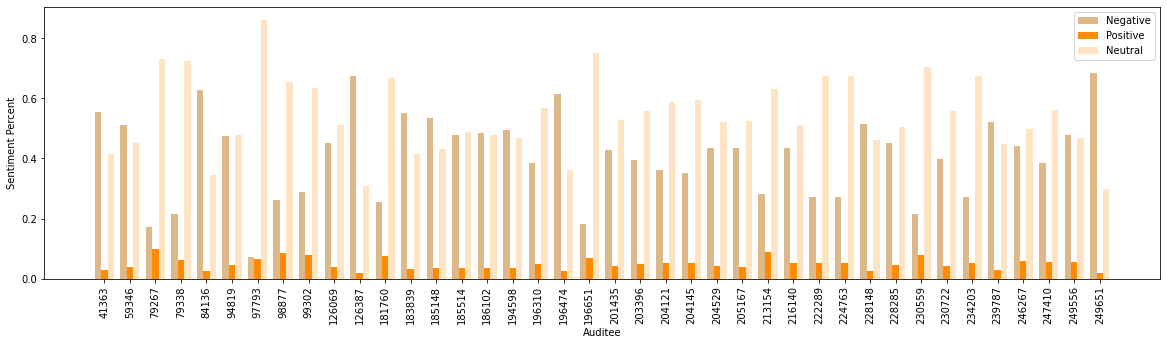

In [22]:
## Sentiment Plot
plt = triple_bar_plot(audits[['DBKEY', 'negative_pct', 'neutral_pct', 'positive_pct']].copy())